# <div style="text-align: center; background-color: black; color: white; padding: 14px; line-height: 1;border-radius:0px"> Injuries in road accidents in Palestine, by governorate, age group, and type of injury 2020-2021</div>

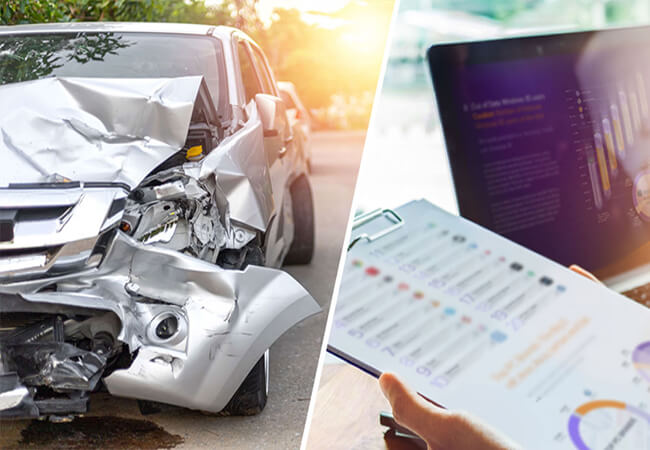

# <div style="text-align: center; background-color: black; color: white; padding: 14px; line-height: 1;border-radius:0px"> DATA ANALYSIS ON  Injuries in road accidents in Palestine</div>

The costs of fatalities and injuries due to traffic accidents have a great impact on the society. In recent years, researchers have paid increasing attention to determining factors that significantly affect severity of driver injuries caused by traffic accidents. Applying data mining techniques to model traffic accident data records can help to understand the characteristics of driver's behaviour, roadway condition and weather condition that were causally connected with different injury severity.

# <div style="text-align: center; background-color: black; color: white; padding: 14px; line-height: 1;border-radius:0px">About The DataSet</div>

## The accident dataset in Palestine contains **11 columns**** 

								

**1. Year** : The year  of accidents.

**2.Governorate** : Names of Palestinian cities

**3. Less than seven years** : Ages less than seven years old who have had traffic accidents.

**4. 7 years - less than 18** : Ages 7 years - less than 18 old who have had traffic accidents.

**5. 18 years-less than 45** : Ages between 18 years and less than 45 who have done accidents.

**6. Up to 45 year** : Ages up to 45 years old who have had traffic accidents.

**7. Slightly Injured** : Injuries that are minor.

**8. Moderately Injured** :Moderate injury as a result of traffic accidents. 

**9. Seriously Injured** : People who have been seriously injured.

 **10. Fatally Injured** : The injuries were fatal

**11. Total Age Group** : The total age group who have had traffic accidents.




# 1.  DATA PREPROCESSING 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import country_converter as coco
import plotly.express as px

In [2]:
os.chdir('C:/Users/SAQERpc/Desktop/data')

In [3]:
Pr = pd.read_csv('Project.csv')
Pr.head().style.set_properties(**{'background-color':'gold',
                                     'color': 'purple'})

In [4]:
#The number of registered road accidents and the number of injured people in the West Bank* by type of injury during the years 2015-2021
road  = pd.read_csv('Registered road accidents.csv')
road .head().style.set_properties(**{'background-color':'gold',
                                     'color': 'purple'})

In [5]:
Pr.shape

(22, 11)

In [6]:
# Recognize column names
Pr.columns.tolist()

['Year',
 'Governorate',
 'Less than seven years',
 '7 years - less than 18',
 '18 years-less than 45',
 'Up to 45 year',
 'Slightly Injured',
 'Moderately Injured',
 'Seriously Injured',
 'Fatally Injured',
 'Total_Age_Group']

In [7]:
Pr[:10]

Year               Governorate  Less than seven years  \
0  2021                     Jenin                    102   
1  2021  Tubas & Northern Valleys                     39   
2  2021                   Tulkarm                     65   
3  2021                    Nablus                    179   
4  2021                 Qalqiliya                     22   
5  2021                    Salfit                     36   
6  2021     Ramallah and Al-Bireh                    102   
7  2021       Jericho & Al-Aghwar                     23   
8  2021                 Jerusalem                     27   
9  2021                 Bethlehem                     46   

   7 years - less than 18  18 years-less than 45  Up to 45 year  \
0                     167                    938            154   
1                      41                    213             34   
2                      90                    568            138   
3                     327                   1634            405   
4                      37                    171             43   
5                      48                    303             50   
6                     166                   1291            164   
7                      42                    266             65   
8                      52                    248             50   
9                      76                    699            111   

   Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured  \
0              1296                  52                 13               15   
1               310                  11                  6                5   
2               767                  75                 19                8   
3              2399                 118                 28               20   
4               224                  47                  2                4   
5               419                  15                  3                0   
6              1592                 110                 21               17   
7               368                  26                  2                5   
8               336                  37                  4                7   
9               896                  23                 13                9   

   Total_Age_Group  
0             1361  
1              327  
2              861  
3             2545  
4              273  
5              437  
6             1723  
7              396  
8              377  
9              932

In [8]:
Pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    22 non-null     int64 
 1   Governorate             22 non-null     object
 2   Less than seven years   22 non-null     int64 
 3   7 years - less than 18  22 non-null     int64 
 4   18 years-less than 45   22 non-null     int64 
 5   Up to 45 year           22 non-null     int64 
 6   Slightly Injured        22 non-null     int64 
 7   Moderately Injured      22 non-null     int64 
 8   Seriously Injured       22 non-null     int64 
 9   Fatally Injured         22 non-null     int64 
 10  Total_Age_Group         22 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.0+ KB


In [9]:
Pr.Governorate.unique()

array(['Jenin', 'Tubas & Northern Valleys', 'Tulkarm', 'Nablus',
       'Qalqiliya', 'Salfit', 'Ramallah and Al-Bireh',
       'Jericho & Al-Aghwar', 'Jerusalem', 'Bethlehem', 'Hebron'],
      dtype=object)

In [10]:
#Arrange items by penny for the city AND Total_Age_Group 
Gpr = Pr.groupby(['Governorate', 'Total_Age_Group','Year'])
Gpr.first()

Less than seven years  \
Governorate              Total_Age_Group Year                          
Bethlehem                590             2020                     34   
                         932             2021                     46   
Hebron                   1314            2020                    134   
                         1811            2021                    154   
Jenin                    1075            2020                     92   
                         1361            2021                    102   
Jericho & Al-Aghwar      290             2020                     22   
                         396             2021                     23   
Jerusalem                319             2020                     15   
                         377             2021                     27   
Nablus                   2057            2020                    148   
                         2545            2021                    179   
Qalqiliya                223             2020                     27   
                         273             2021                     22   
Ramallah and Al-Bireh    1427            2020                     86   
                         1723            2021                    102   
Salfit                   327             2020                     29   
                         437             2021                     36   
Tubas & Northern Valleys 208             2020                     15   
                         327             2021                     39   
Tulkarm                  689             2020                     52   
                         861             2021                     65   

                                               7 years - less than 18  \
Governorate              Total_Age_Group Year                           
Bethlehem                590             2020                      56   
                         932             2021                      76   
Hebron                   1314            2020                     143   
                         1811            2021                     255   
Jenin                    1075            2020                     145   
                         1361            2021                     167   
Jericho & Al-Aghwar      290             2020                      46   
                         396             2021                      42   
Jerusalem                319             2020                      45   
                         377             2021                      52   
Nablus                   2057            2020                     233   
                         2545            2021                     327   
Qalqiliya                223             2020                      38   
                         273             2021                      37   
Ramallah and Al-Bireh    1427            2020                     147   
                         1723            2021                     166   
Salfit                   327             2020                      38   
                         437             2021                      48   
Tubas & Northern Valleys 208             2020                      34   
                         327             2021                      41   
Tulkarm                  689             2020                      80   
                         861             2021                      90   

                                               18 years-less than 45  \
Governorate              Total_Age_Group Year                          
Bethlehem                590             2020                    433   
                         932             2021                    699   
Hebron                   1314            2020                    834   
                         1811            2021                   1088   
Jenin                    1075            2020                    704   
                         1361            2021                

In [11]:
Pr.iloc[[9,20]]

Year Governorate  Less than seven years  7 years - less than 18  \
9   2021   Bethlehem                     46                      76   
20  2020   Bethlehem                     34                      56   

    18 years-less than 45  Up to 45 year  Slightly Injured  \
9                     699            111               896   
20                    433             67               566   

    Moderately Injured  Seriously Injured  Fatally Injured  Total_Age_Group  
9                   23                 13                9              932  
20                  16                  8                4              590

According to the statistics of the Palestinian Central Bureau of Statistics, we will see here that the percentage of
Road accidents by age group and type of injury were increasing in Bethlehem .

In [12]:
# Check fields that do not contain data
display(Pr.isna().sum())

Year                      0
Governorate               0
Less than seven years     0
7 years - less than 18    0
18 years-less than 45     0
Up to 45 year             0
Slightly Injured          0
Moderately Injured        0
Seriously Injured         0
Fatally Injured           0
Total_Age_Group           0
dtype: int64

In [13]:
Pr.tail().describe()

Year  Less than seven years  7 years - less than 18  \
count     5.0                5.00000                5.000000   
mean   2020.0               58.20000               87.400000   
std       0.0               50.69714               52.775941   
min    2020.0               15.00000               45.000000   
25%    2020.0               22.00000               46.000000   
50%    2020.0               34.00000               56.000000   
75%    2020.0               86.00000              143.000000   
max    2020.0              134.00000              147.000000   

       18 years-less than 45  Up to 45 year  Slightly Injured  \
count               5.000000       5.000000          5.000000   
mean              542.200000     100.200000        707.200000   
std               378.550789      75.483111        487.947436   
min               193.000000      29.000000        261.000000   
25%               213.000000      46.000000        274.000000   
50%               433.000000      67.000000        566.000000   
75%               834.000000     156.000000       1106.000000   
max              1038.000000     203.000000       1329.000000   

       Moderately Injured  Seriously Injured  Fatally Injured  Total_Age_Group  
count             5.00000           5.000000         5.000000         5.000000  
mean             66.40000          14.400000        11.800000       788.000000  
std              58.46623          19.743353        13.292855       545.931772  
min              16.00000           1.000000         4.000000       290.000000  
25%              26.00000           3.000000         4.000000       319.000000  
50%              44.00000           8.000000         5.000000       590.000000  
75%              87.00000          11.000000        11.000000      1314.000000  
max             159.00000          49.000000        35.000000      1427.000000

In [14]:
Pr.aggregate(['sum'])

Year                                        Governorate  \
sum  44451  JeninTubas & Northern ValleysTulkarmNablusQalq...   

     Less than seven years  7 years - less than 18  18 years-less than 45  \
sum                   1449                    2306                  13136   

     Up to 45 year  Slightly Injured  Moderately Injured  Seriously Injured  \
sum           2671             17854                1378                330   

     Fatally Injured  Total_Age_Group  
sum              243            19562

In [15]:
# We are going to find aggregation for these columns
Pr.aggregate({"Slightly Injured":[ 'min','max','sum'],
              "Moderately Injured":['min','max','sum'],
              "Seriously Injured":['min','max','sum'], 
              "Fatally Injured":['min', 'max','sum']})

Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured
min               185                  11                  1                0
max              2399                 220                 86               43
sum             17854                1378                330              243

In [16]:
#To get the number of records for each city separately
Pr['Governorate'].value_counts()

Jenin                       2
Tubas & Northern Valleys    2
Tulkarm                     2
Nablus                      2
Qalqiliya                   2
Salfit                      2
Ramallah and Al-Bireh       2
Jericho & Al-Aghwar         2
Jerusalem                   2
Bethlehem                   2
Hebron                      2
Name: Governorate, dtype: int64

In [17]:
#The degree of correlation between data characteristics
Pr.corr()

Year  Less than seven years  \
Year                    1.000000               0.129229   
Less than seven years   0.129229               1.000000   
7 years - less than 18  0.166027               0.969930   
18 years-less than 45   0.173580               0.931821   
Up to 45 year           0.170648               0.965274   
Slightly Injured        0.174387               0.945858   
Moderately Injured      0.077327               0.832798   
Seriously Injured       0.153692               0.746698   
Fatally Injured         0.099826               0.848458   
Total_Age_Group         0.171691               0.961503   

                        7 years - less than 18  18 years-less than 45  \
Year                                  0.166027               0.173580   
Less than seven years                 0.969930               0.931821   
7 years - less than 18                1.000000               0.948313   
18 years-less than 45                 0.948313               1.000000   
Up to 45 year                         0.977902               0.927238   
Slightly Injured                      0.967809               0.995364   
Moderately Injured                    0.781068               0.718556   
Seriously Injured                     0.681594               0.578446   
Fatally Injured                       0.775152               0.697133   
Total_Age_Group                       0.975856               0.993459   

                        Up to 45 year  Slightly Injured  Moderately Injured  \
Year                         0.170648          0.174387            0.077327   
Less than seven years        0.965274          0.945858            0.832798   
7 years - less than 18       0.977902          0.967809            0.781068   
18 years-less than 45        0.927238          0.995364            0.718556   
Up to 45 year                1.000000          0.948528            0.818707   
Slightly Injured             0.948528          1.000000            0.709972   
Moderately Injured           0.818707          0.709972            1.000000   
Seriously Injured            0.722347          0.577578            0.915420   
Fatally Injured              0.788206          0.696201            0.918380   
Total_Age_Group              0.962166          0.997041            0.761451   

                        Seriously Injured  Fatally Injured  Total_Age_Group  
Year                             0.153692         0.099826         0.171691  
Less than seven years            0.746698         0.848458         0.961503  
7 years - less than 18           0.681594         0.775152         0.975856  
18 years-less than 45            0.578446         0.697133         0.993459  
Up to 45 year                    0.722347         0.788206         0.962166  
Slightly Injured                 0.577578         0.696201         0.997041  
Moderately Injured               0.915420         0.918380         0.761451  
Seriously Injured                1.000000         0.938990         0.634756  
Fatally Injured                  0.938990         1.000000         0.742925  
Total_Age_Group                  0.634756         0.742925         1.000000

********************************************************************************************************************************
********************************************************************************************************************************
--------------------------------------------------------------------------------------------------------------------------------

In [18]:
gpr = Pr.groupby('Governorate')
gpr.get_group('Hebron')

Year Governorate  Less than seven years  7 years - less than 18  \
10  2021      Hebron                    154                     255   
21  2020      Hebron                    134                     143   

    18 years-less than 45  Up to 45 year  Slightly Injured  \
10                   1088            314              1505   
21                    834            203              1106   

    Moderately Injured  Seriously Injured  Fatally Injured  Total_Age_Group  
10                 220                 86               43             1811  
21                 159                 49               35             1314

In [19]:
#add new column
Pr=Pr.assign(
    Total_of_Type_Injury=lambda x:Pr['Moderately Injured']+Pr['Slightly Injured']+Pr['Fatally Injured'])
Pr

Year               Governorate  Less than seven years  \
0   2021                     Jenin                    102   
1   2021  Tubas & Northern Valleys                     39   
2   2021                   Tulkarm                     65   
3   2021                    Nablus                    179   
4   2021                 Qalqiliya                     22   
5   2021                    Salfit                     36   
6   2021     Ramallah and Al-Bireh                    102   
7   2021       Jericho & Al-Aghwar                     23   
8   2021                 Jerusalem                     27   
9   2021                 Bethlehem                     46   
10  2021                    Hebron                    154   
11  2020                     Jenin                     92   
12  2020  Tubas & Northern Valleys                     15   
13  2020                   Tulkarm                     52   
14  2020                    Nablus                    148   
15  2020                 Qalqiliya                     27   
16  2020                    Salfit                     29   
17  2020     Ramallah and Al-Bireh                     86   
18  2020       Jericho & Al-Aghwar                     22   
19  2020                 Jerusalem                     15   
20  2020                 Bethlehem                     34   
21  2020                    Hebron                    134   

    7 years - less than 18  18 years-less than 45  Up to 45 year  \
0                      167                    938            154   
1                       41                    213             34   
2                       90                    568            138   
3                      327                   1634            405   
4                       37                    171             43   
5                       48                    303             50   
6                      166                   1291            164   
7                       42                    266             65   
8                       52                    248             50   
9                       76                    699            111   
10                     255                   1088            314   
11                     145                    704            134   
12                      34                    136             23   
13                      80                    445            112   
14                     233                   1372            304   
15                      38                    125             33   
16                      38                    224             36   
17                     147                   1038            156   
18                      46                    193             29   
19                      45                    213             46   
20                      56                    433             67   
21                     143                    834            203   

    Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured  \
0               1296                  52                 13               15   
1                310                  11                  6                5   
2                767                  75                 19                8   
3               2399                 118                 28               20   
4                224                  47                  2                4   
5                419                  15                  3                0   
6               1592                 110                 21               17   
7                368                  26                  2                5   
8                336                  37                  4                7   
9                896                  23                 13                9   
10              1505                 220                 86               43   
11              1031                  35                  9               1

In [20]:
Pr=Pr.assign(
    Total=lambda x:(Pr['Total_Age_Group']+Pr['Total_of_Type_Injury'])/2)
Pr

Year               Governorate  Less than seven years  \
0   2021                     Jenin                    102   
1   2021  Tubas & Northern Valleys                     39   
2   2021                   Tulkarm                     65   
3   2021                    Nablus                    179   
4   2021                 Qalqiliya                     22   
5   2021                    Salfit                     36   
6   2021     Ramallah and Al-Bireh                    102   
7   2021       Jericho & Al-Aghwar                     23   
8   2021                 Jerusalem                     27   
9   2021                 Bethlehem                     46   
10  2021                    Hebron                    154   
11  2020                     Jenin                     92   
12  2020  Tubas & Northern Valleys                     15   
13  2020                   Tulkarm                     52   
14  2020                    Nablus                    148   
15  2020                 Qalqiliya                     27   
16  2020                    Salfit                     29   
17  2020     Ramallah and Al-Bireh                     86   
18  2020       Jericho & Al-Aghwar                     22   
19  2020                 Jerusalem                     15   
20  2020                 Bethlehem                     34   
21  2020                    Hebron                    134   

    7 years - less than 18  18 years-less than 45  Up to 45 year  \
0                      167                    938            154   
1                       41                    213             34   
2                       90                    568            138   
3                      327                   1634            405   
4                       37                    171             43   
5                       48                    303             50   
6                      166                   1291            164   
7                       42                    266             65   
8                       52                    248             50   
9                       76                    699            111   
10                     255                   1088            314   
11                     145                    704            134   
12                      34                    136             23   
13                      80                    445            112   
14                     233                   1372            304   
15                      38                    125             33   
16                      38                    224             36   
17                     147                   1038            156   
18                      46                    193             29   
19                      45                    213             46   
20                      56                    433             67   
21                     143                    834            203   

    Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured  \
0               1296                  52                 13               15   
1                310                  11                  6                5   
2                767                  75                 19                8   
3               2399                 118                 28               20   
4                224                  47                  2                4   
5                419                  15                  3                0   
6               1592                 110                 21               17   
7                368                  26                  2                5   
8                336                  37                  4                7   
9                896                  23                 13                9   
10              1505                 220                 86               43   
11              1031                  35                  9               1

In [21]:
#Z-score is also known as standard score gives us an idea of how far a data point is from the mean. 
Pr.assign(
    z_score_volume=lambda y: \
       y.Total_Age_Group.sub(y.Total_Age_Group.mean()).div(y.Total_Age_Group.std()).abs()
).query('z_score_volume > 1')

Year            Governorate  Less than seven years  \
3   2021                 Nablus                    179   
6   2021  Ramallah and Al-Bireh                    102   
10  2021                 Hebron                    154   
14  2020                 Nablus                    148   

    7 years - less than 18  18 years-less than 45  Up to 45 year  \
3                      327                   1634            405   
6                      166                   1291            164   
10                     255                   1088            314   
14                     233                   1372            304   

    Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured  \
3               2399                 118                 28               20   
6               1592                 110                 21               17   
10              1505                 220                 86               43   
14              1914                 121                 22               20   

    Total_Age_Group  Total_of_Type_Injury   Total  z_score_volume  
3              2545                  2537  2541.0        2.420988  
6              1723                  1719  1721.0        1.219134  
10             1811                  1768  1789.5        1.347800  
14             2057                  2055  2056.0        1.707479

In [22]:
#pct_change() function to find the percentage change in the data 
Pr.assign(
    Total_pct_change=Pr.Total_Age_Group.pct_change(),
    pct_change_rank=lambda x: \
        x.Total_pct_change.abs().rank(ascending=False)
).nsmallest(2, 'pct_change_rank')

Year            Governorate  Less than seven years  \
17  2020  Ramallah and Al-Bireh                     86   
6   2021  Ramallah and Al-Bireh                    102   

    7 years - less than 18  18 years-less than 45  Up to 45 year  \
17                     147                   1038            156   
6                      166                   1291            164   

    Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured  \
17              1329                  87                 11               11   
6               1592                 110                 21               17   

    Total_Age_Group  Total_of_Type_Injury   Total  Total_pct_change  \
17             1427                  1427  1427.0          3.363914   
6              1723                  1719  1721.0          2.942792   

    pct_change_rank  
17              1.0  
6               2.0

In [23]:
Pr['Rank'] = Pr['Total'].rank()
Pr

Year               Governorate  Less than seven years  \
0   2021                     Jenin                    102   
1   2021  Tubas & Northern Valleys                     39   
2   2021                   Tulkarm                     65   
3   2021                    Nablus                    179   
4   2021                 Qalqiliya                     22   
5   2021                    Salfit                     36   
6   2021     Ramallah and Al-Bireh                    102   
7   2021       Jericho & Al-Aghwar                     23   
8   2021                 Jerusalem                     27   
9   2021                 Bethlehem                     46   
10  2021                    Hebron                    154   
11  2020                     Jenin                     92   
12  2020  Tubas & Northern Valleys                     15   
13  2020                   Tulkarm                     52   
14  2020                    Nablus                    148   
15  2020                 Qalqiliya                     27   
16  2020                    Salfit                     29   
17  2020     Ramallah and Al-Bireh                     86   
18  2020       Jericho & Al-Aghwar                     22   
19  2020                 Jerusalem                     15   
20  2020                 Bethlehem                     34   
21  2020                    Hebron                    134   

    7 years - less than 18  18 years-less than 45  Up to 45 year  \
0                      167                    938            154   
1                       41                    213             34   
2                       90                    568            138   
3                      327                   1634            405   
4                       37                    171             43   
5                       48                    303             50   
6                      166                   1291            164   
7                       42                    266             65   
8                       52                    248             50   
9                       76                    699            111   
10                     255                   1088            314   
11                     145                    704            134   
12                      34                    136             23   
13                      80                    445            112   
14                     233                   1372            304   
15                      38                    125             33   
16                      38                    224             36   
17                     147                   1038            156   
18                      46                    193             29   
19                      45                    213             46   
20                      56                    433             67   
21                     143                    834            203   

    Slightly Injured  Moderately Injured  Seriously Injured  Fatally Injured  \
0               1296                  52                 13               15   
1                310                  11                  6                5   
2                767                  75                 19                8   
3               2399                 118                 28               20   
4                224                  47                  2                4   
5                419                  15                  3                0   
6               1592                 110                 21               17   
7                368                  26                  2                5   
8                336                  37                  4                7   
9                896                  23                 13                9   
10              1505                 220                 86               43   
11              1031                  35                  9               1

********************************************************************************************************************************
********************************************************************************************************************************
--------------------------------------------------------------------------------------------------------------------------------

# EXPLORATORY DATA ANALYSIS 

**Before starting, we have to put questions in order to be answered through graphing and statistical analysis**

**1. Which of the cities has an increase in traffic accidents and which of them have few accidents?**
 
**2.Are traffic accidents increasing with progress or decreasing?**

**3.What are the most common injuries in accidents?**

**4. During the year 2021, what city had the highest traffic curves during April and October?**

# Which of the cities has an increase in traffic accidents and which of them have few accidents?

In [24]:
# function to define figure 
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 20}
    
fig = px.pie(Pr[:10], values='Total', names='Governorate', title='Highest traffic accidents in cities')
fig.show()

Through the graph, we will notice that the rate of traffic accidents is high in the city of Nablus.
And that the lowest rate of traffic accidents is in the city of Tubas and the northern valleys, as well as the city of Qalqilya.

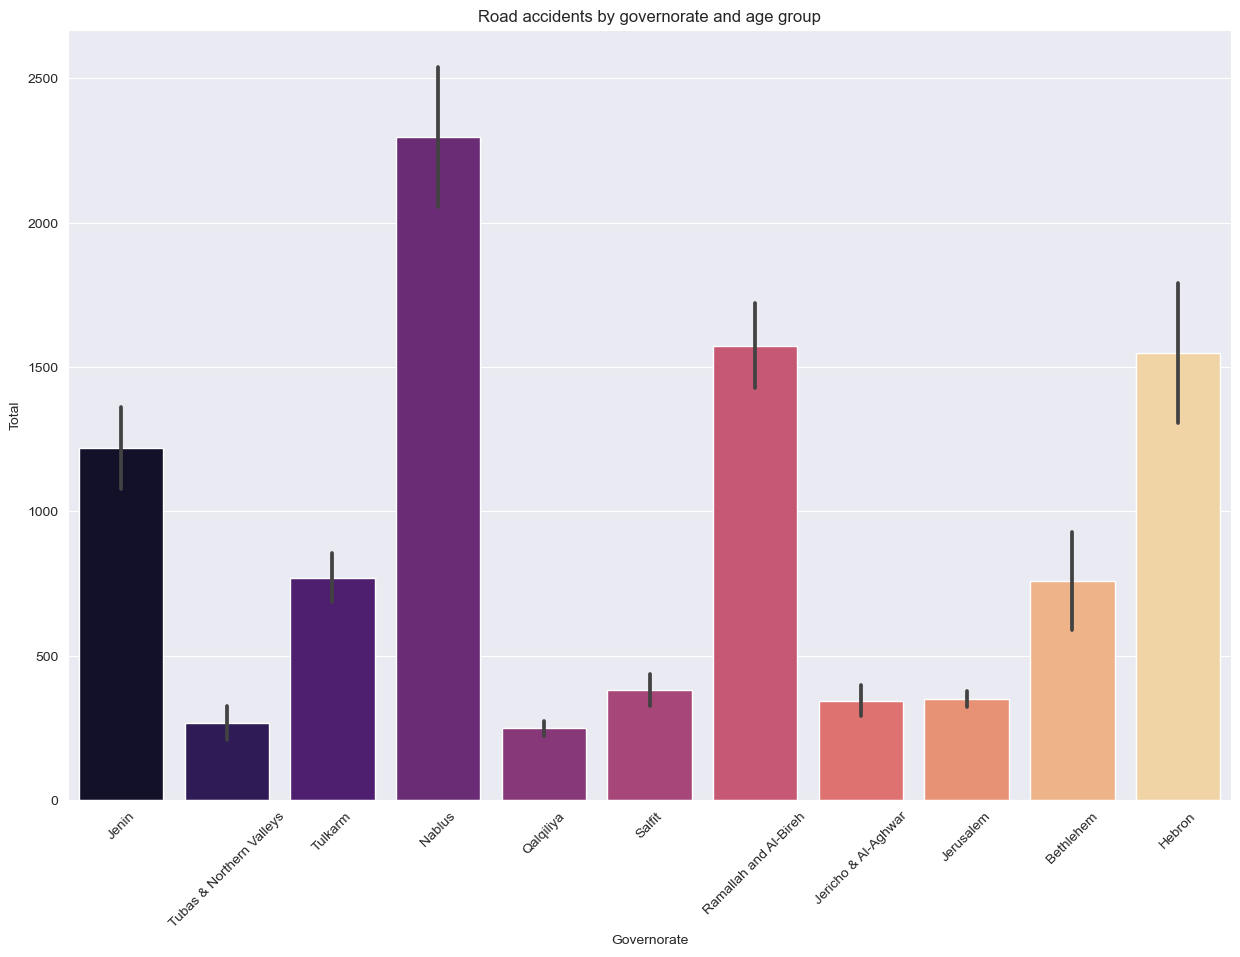

In [25]:
figure_size()
sns.set_style("darkgrid")
sns.barplot(x='Governorate',y='Total',data =Pr,palette = 'magma')
plt.title('Road accidents by governorate and age group')
plt.xlabel('Governorate')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

********************************************************************************************************************************
********************************************************************************************************************************

# Are traffic accidents increasing with progress or decreasing?# Are traffic accidents increasing with progress or decreasing?

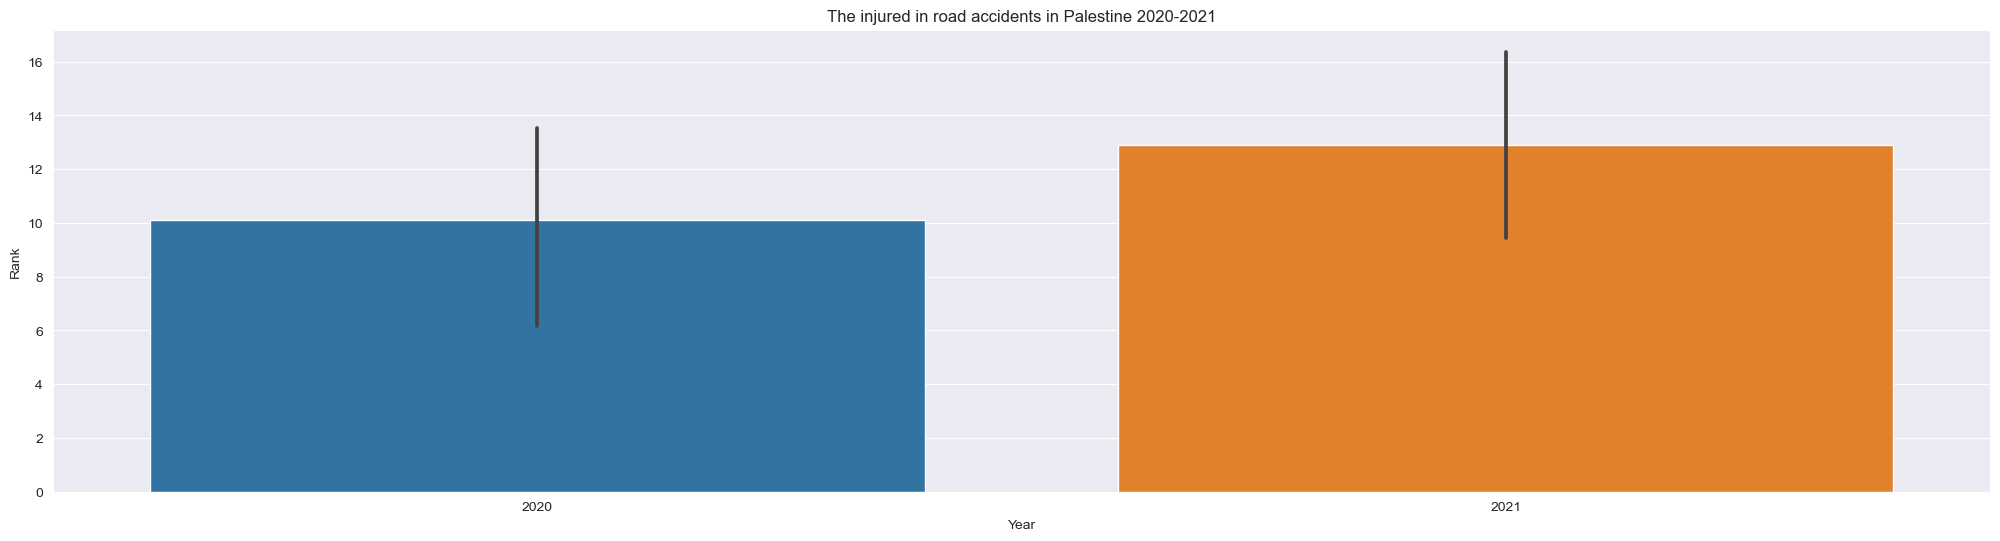

In [26]:
plt.figure(figsize=(25,6))
plt.title('The injured in road accidents in Palestine 2020-2021')
sns.barplot(x=Pr['Year'], y='Rank', data=Pr);

This figure shows that there has been an increase in the rate of traffic accidents over the years, so the rate in 2021 was much higher than in 2020

********************************************************************************************************************************
********************************************************************************************************************************

# What are the most common injuries in accidents?

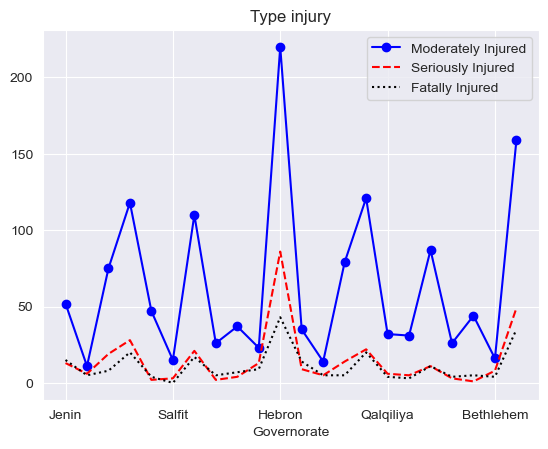

In [27]:
Pr.plot(
    y=['Moderately Injured', 'Seriously Injured', 'Fatally Injured'],
    x='Governorate',
    style=['o-b', '--r', ':k', '.-g'],
   title ='Type injury'
   ).autoscale()

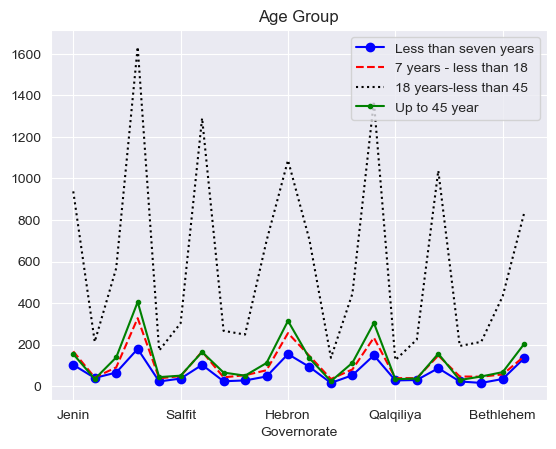

In [28]:
Pr.plot(
    y=['Less than seven years', '7 years - less than 18', '18 years-less than 45', 'Up to 45 year',],
      x='Governorate',
    style=['o-b', '--r', ':k', '.-g'],
     title='Age Group'
   ).autoscale()

<AxesSubplot:title={'center':'car Accidents Box Plot'}>

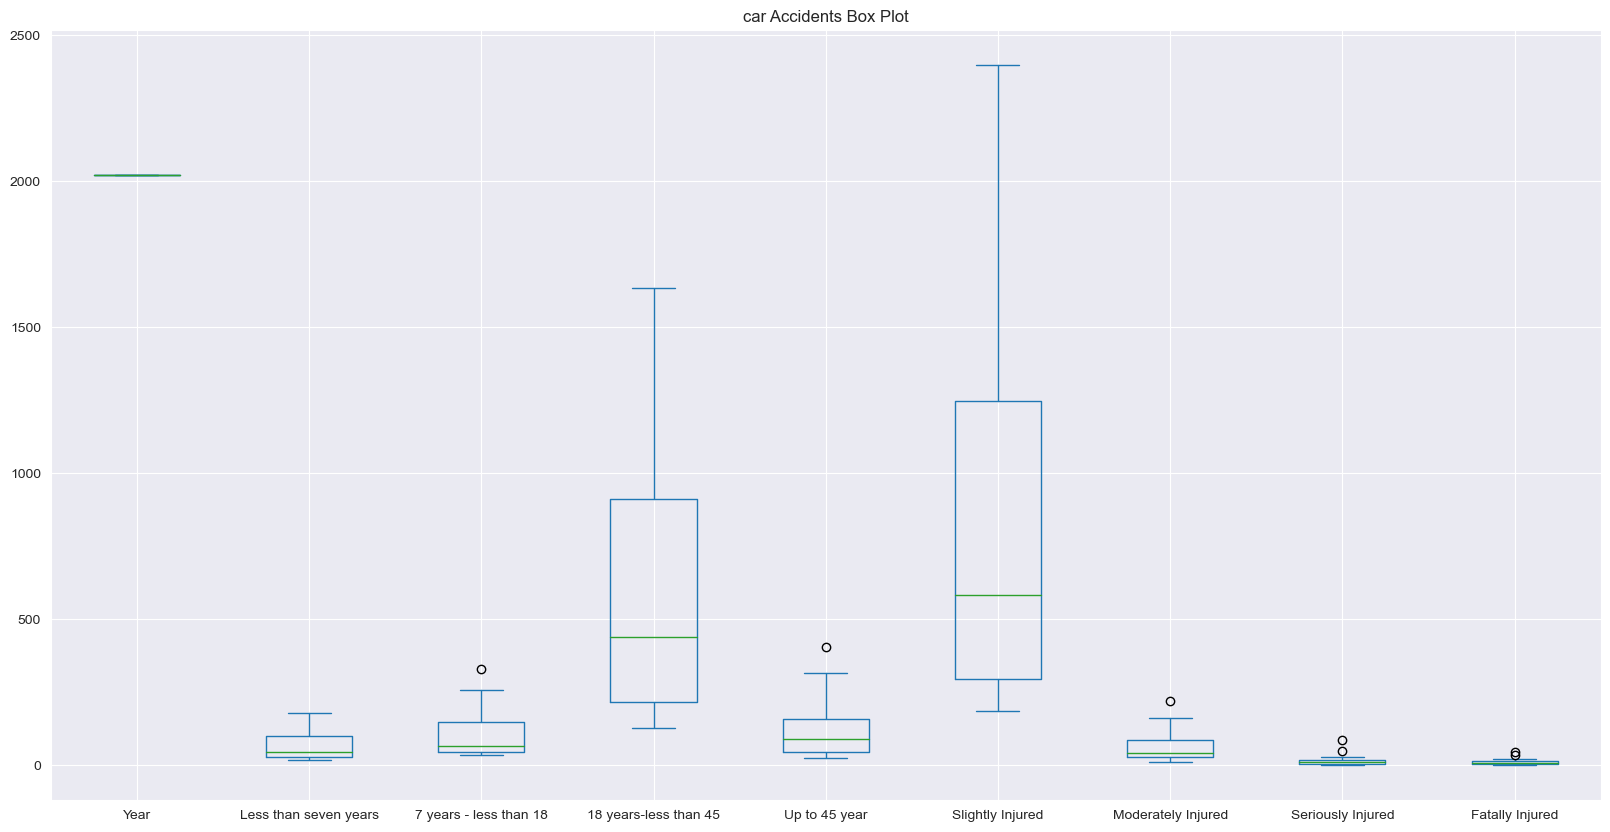

In [29]:
Pr.iloc[:,:10].plot(kind='box',  figsize=(20, 10), title='car Accidents Box Plot')

********************************************************************************************************************************
********************************************************************************************************************************

# During the year 2021, what city had the highest traffic curves during April and October?

In [30]:
month2 = pd.read_csv('2021.csv')
month2.head()

Governorate  Jan.  Feb.  Mar.  April  May  June  July  Aug.  \
0                     Jenin   123   107   110    132  171   176   169   182   
1  Tubas & Northern Valleys    25    24    27     22   34    22    38    51   
2                   Tulkarm    44    52    81     76   78    91    55    74   
3                    Nablus   195   184   159    211  240   240   249   257   
4                 Qalqiliya    12    17    22     36   24    45    26    22   

   Sept.  Oct.  Nov.  Dec.  
0    140   156   168   144  
1     34    30    25    28  
2     81    78    69    70  
3    248   236   274   210  
4     34    36    21    24

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [36]:
def plot_line_chart_by_year(month2, year, column):
    
    # Group the mean data by year
    mean_by_year =month2.groupby(year)[column].mean()

    # Style
    plt.style.use('dark_background')
    plt.figure(figsize=(25, 6))

    # Plot the line chart
    plt.plot(mean_by_year.index, mean_by_year.values, color='limegreen', linewidth=2)

    # Set up other visual elements
    plt.xlabel(year, fontsize = 14, color = 'white')
    plt.ylabel(column, fontsize = 14, color = 'white')
    plt.title(f'{column} by Year', fontsize = 16, color = 'white')

    # Set the colors of ticks and texts
    plt.tick_params(colors = 'white')
    plt.xticks(fontsize = 12, color = 'white')
    plt.yticks(fontsize = 12, color = 'white')
    
    plt.show()


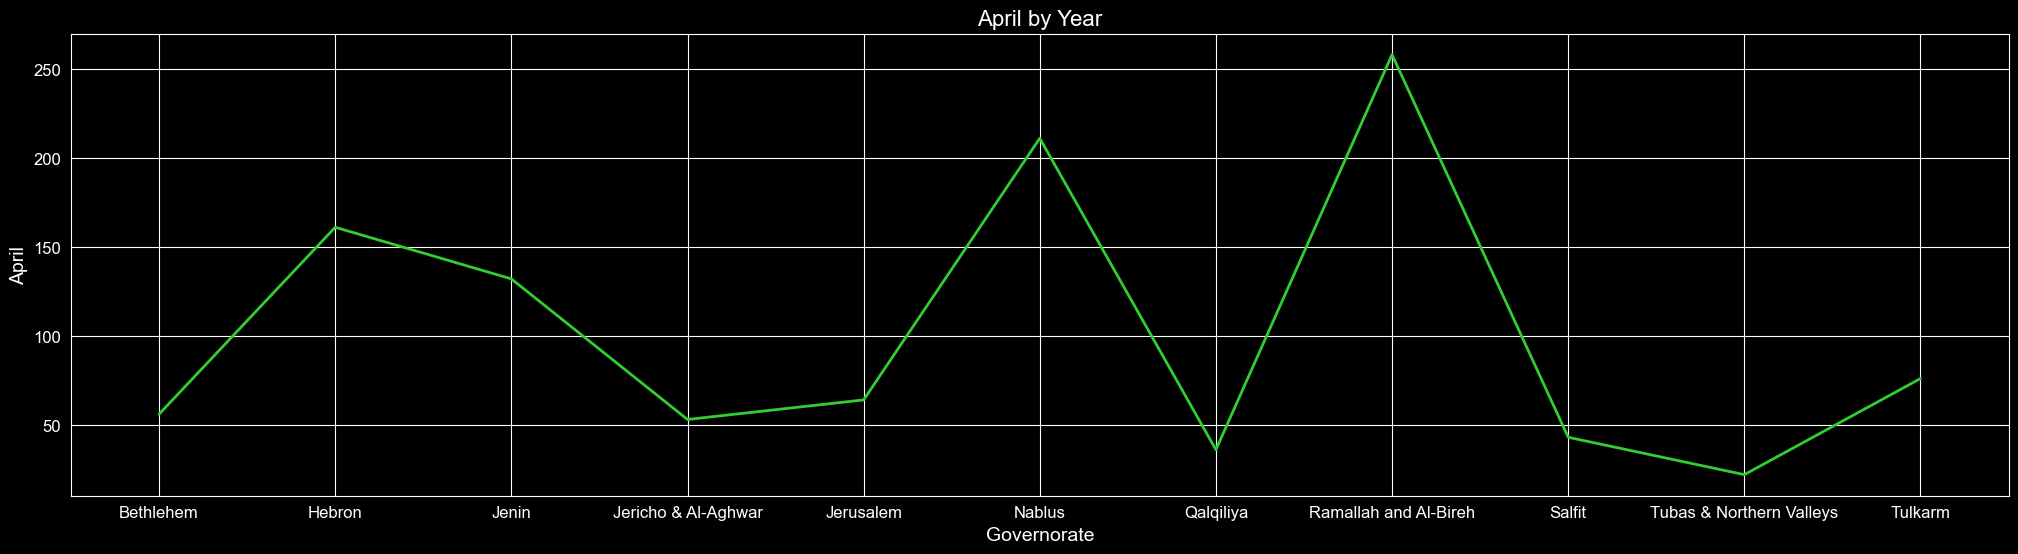

In [37]:
plot_line_chart_by_year(month2, 'Governorate', 'April')

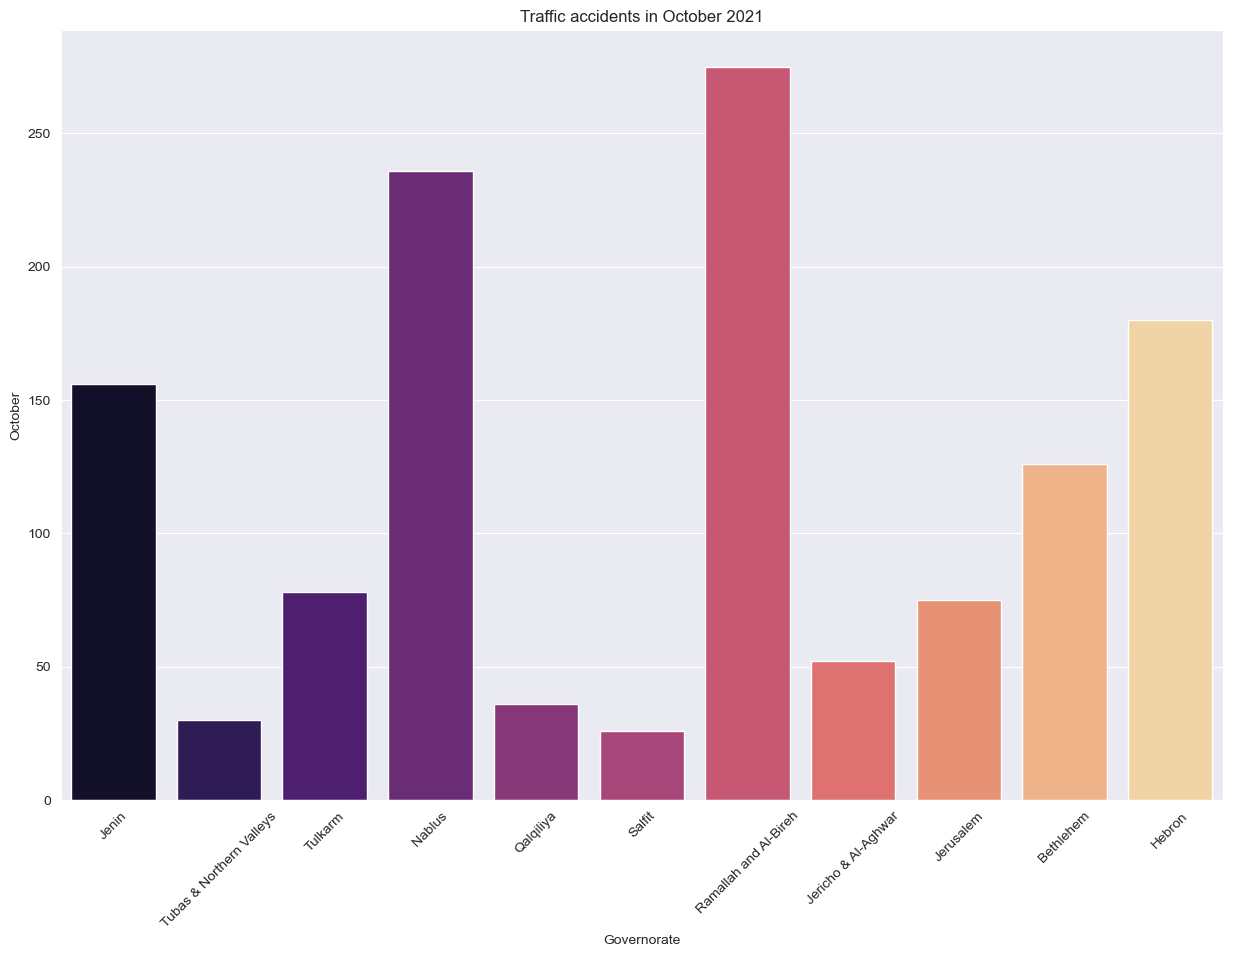

In [31]:
figure_size()
sns.set_style("darkgrid")
sns.barplot(x='Governorate',y='Oct.',data =month2,palette = 'magma')
plt.title('Traffic accidents in October 2021')
plt.xlabel('Governorate')
plt.ylabel('October')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='Frequency'>

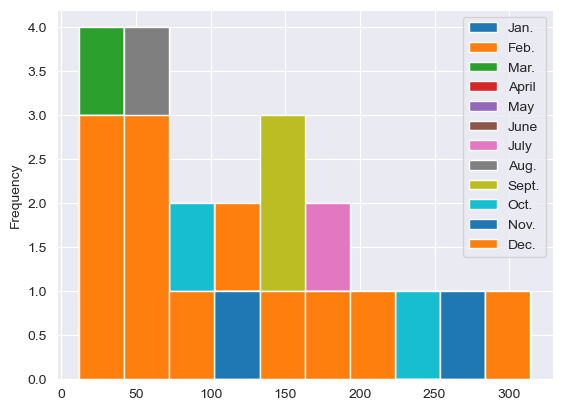

In [31]:
month2 .plot(kind='hist')

********************************************************************************************************************************
********************************************************************************************************************************
--------------------------------------------------------------------------------------------------------------------------------
********************************************************************************************************************************
********************************************************************************************************************************


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

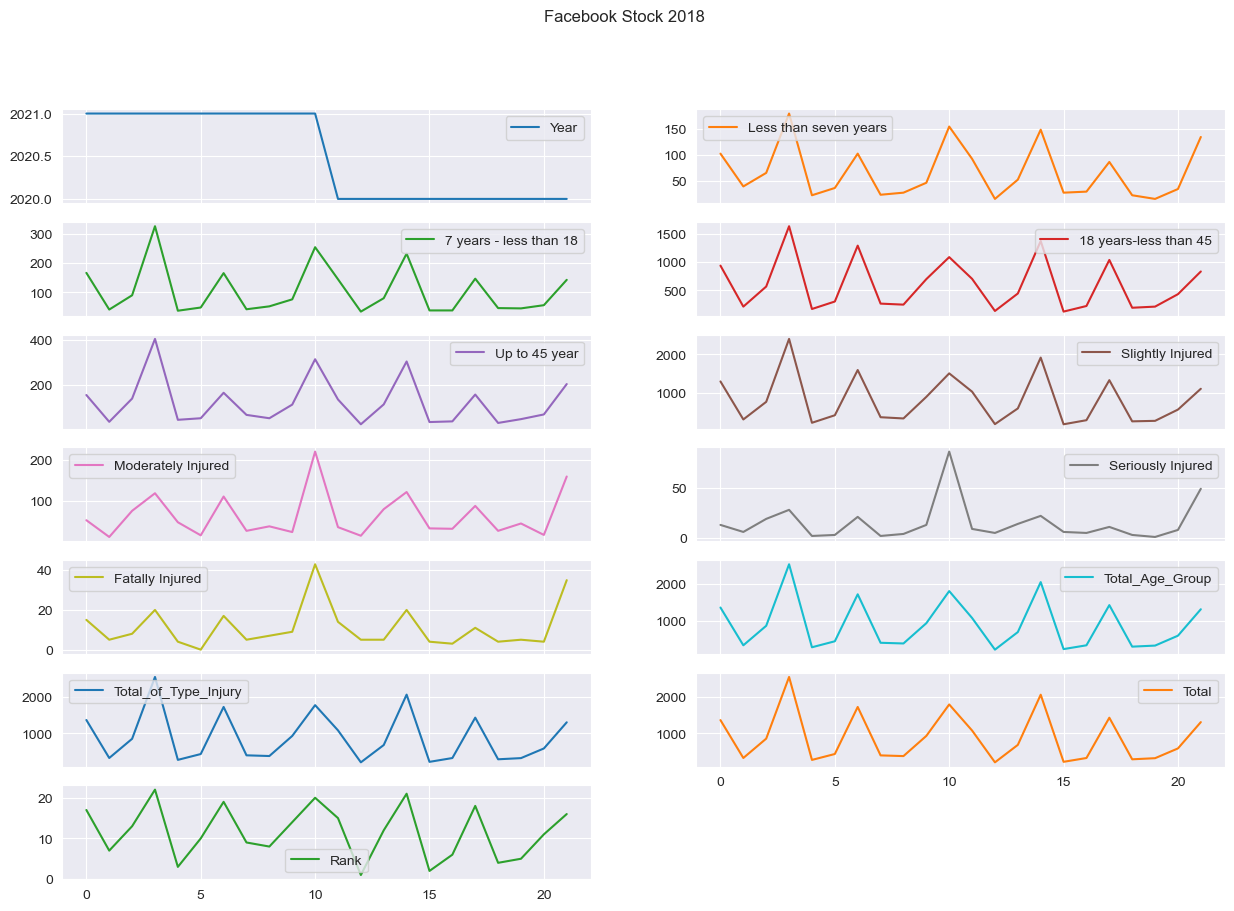

In [32]:
Pr.plot(
    kind='line',
    subplots=True,
    layout=(7, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

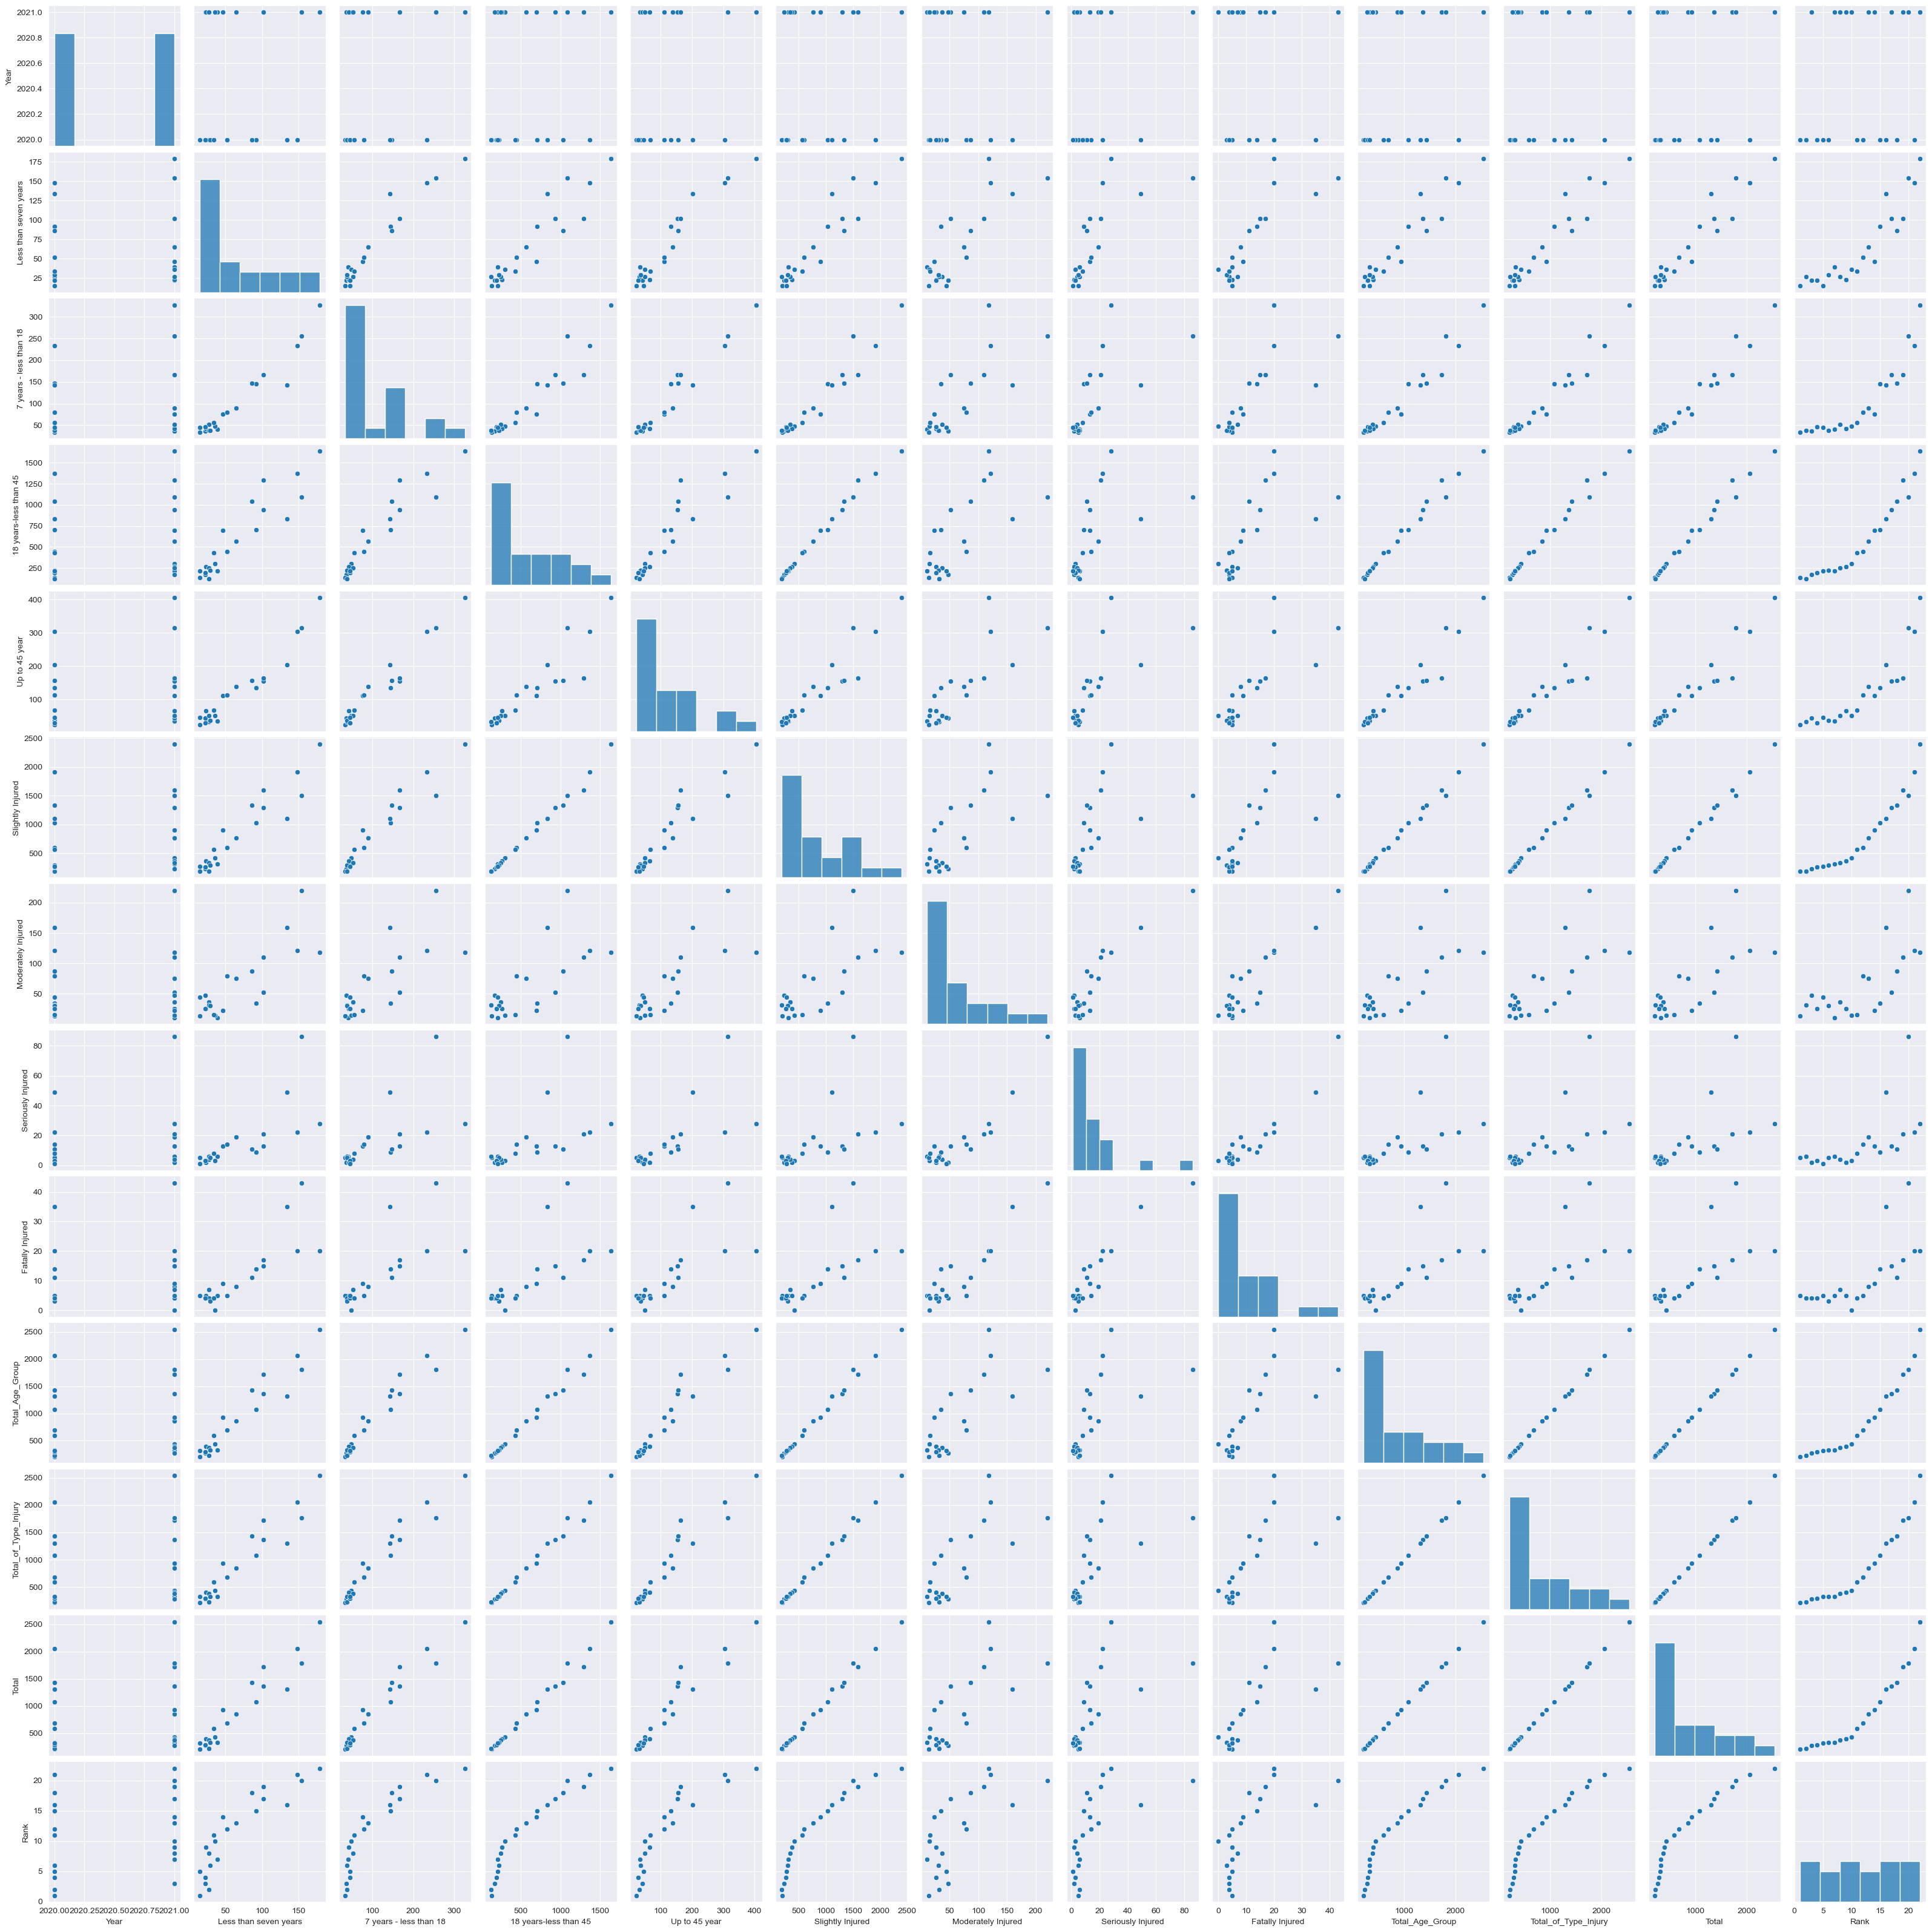

In [33]:
sns.pairplot(Pr)

<AxesSubplot:>

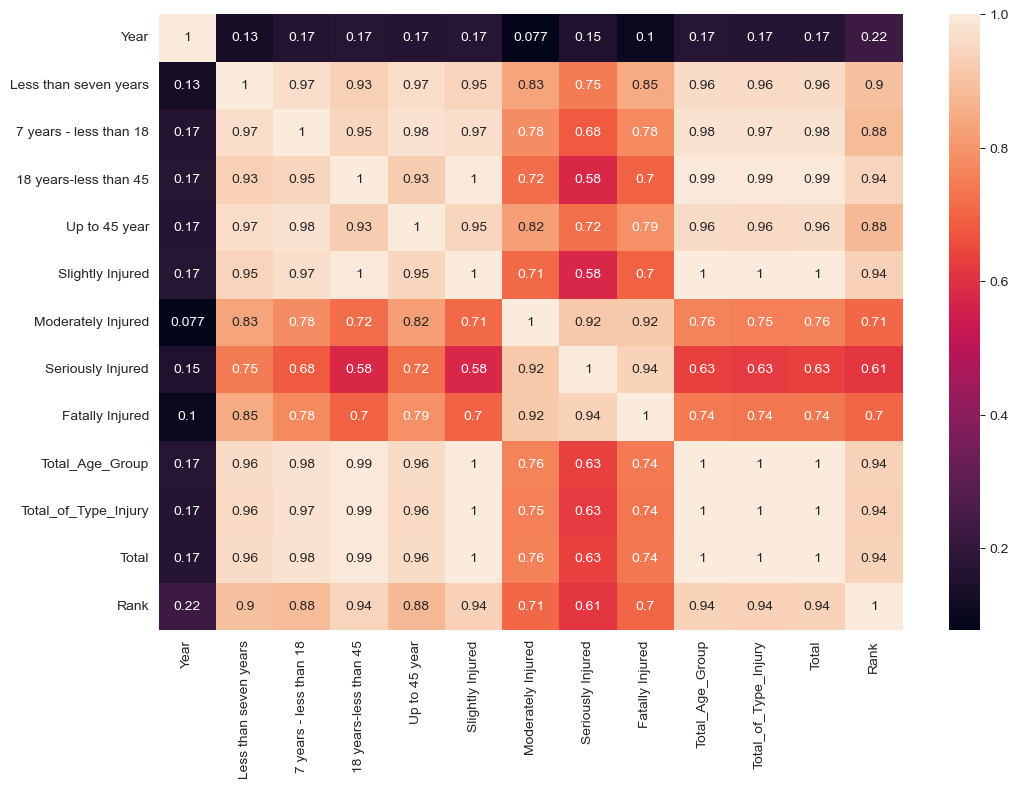

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(Pr.corr(),annot=True)

********************************************************************************************************************************
********************************************************************************************************************************
--------------------------------------------------------------------------------------------------------------------------------



<h2 style="color:Black;"> Thank you for coming and seeing my work 🚀 </h2>
<h2 style="color:Black;"> IRA was done by Mustafa Howr ❤ </h2>

********************************************************************************************************************************
********************************************************************************************************************************
--------------------------------------------------------------------------------------------------------------------------------


# <div style="text-align: center; background-color: black; color: white; padding: 14px; line-height: 1;border-radius:0px"> Artificial intelligence in future cars</div>



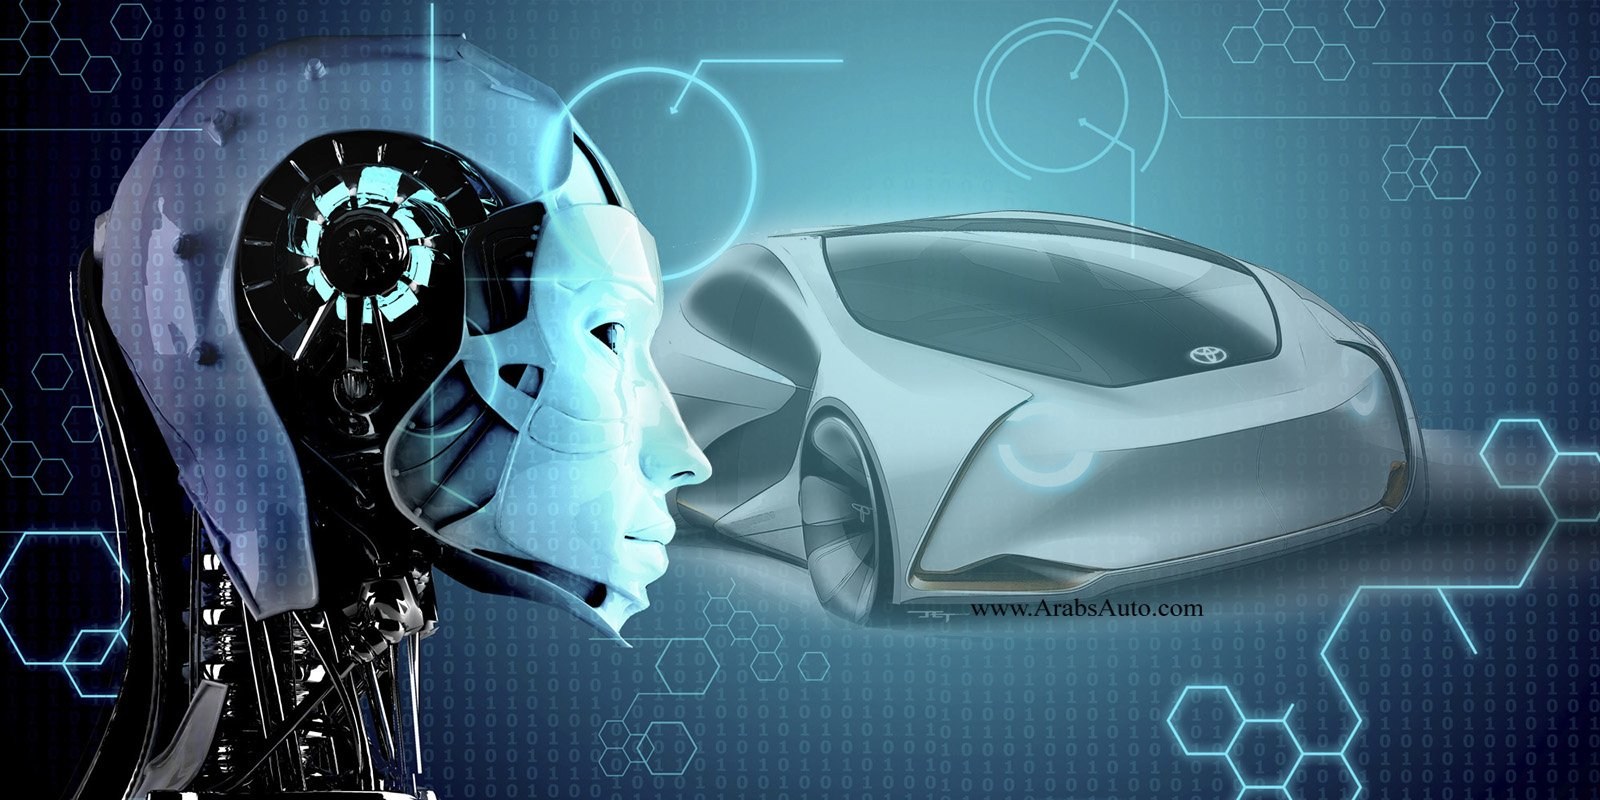

 Manufacturers are trying to develop artificial intelligence technologies in the world of cars, to provide more safety and driving comfort, especially since the future car equipped with artificial intelligence will also play the role of a personal assistant to its driver.
Experts agree that this technology will greatly affect the automotive and transportation sector, and will enable cars in the future to provide many smart suggestions to drivers that contribute to enhancing driving and facilitating control of life matters.

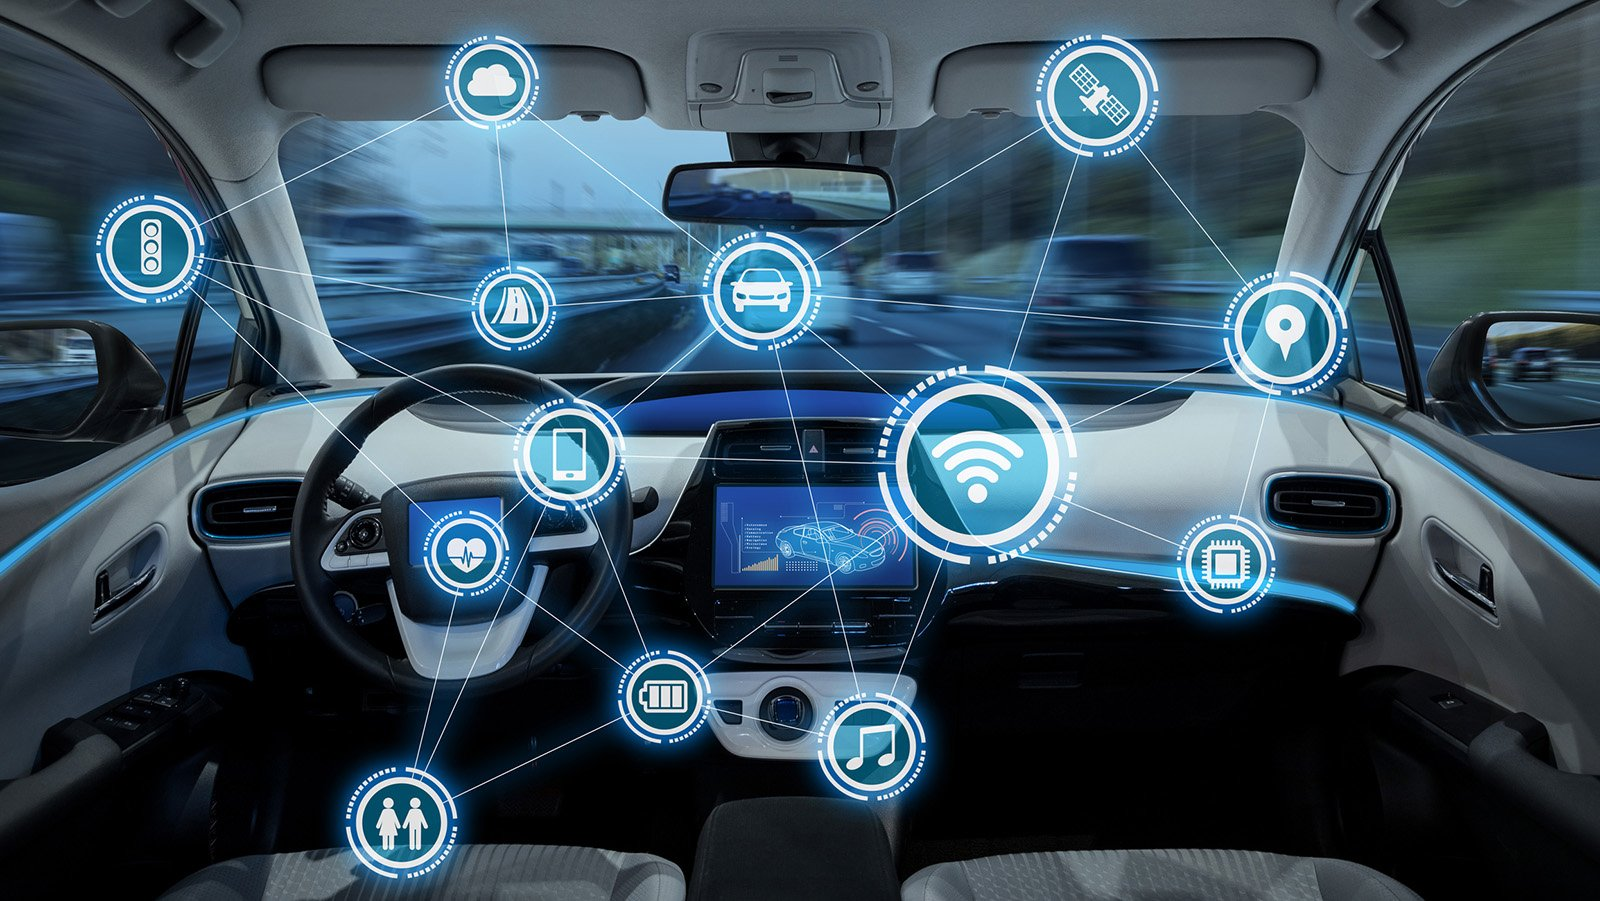



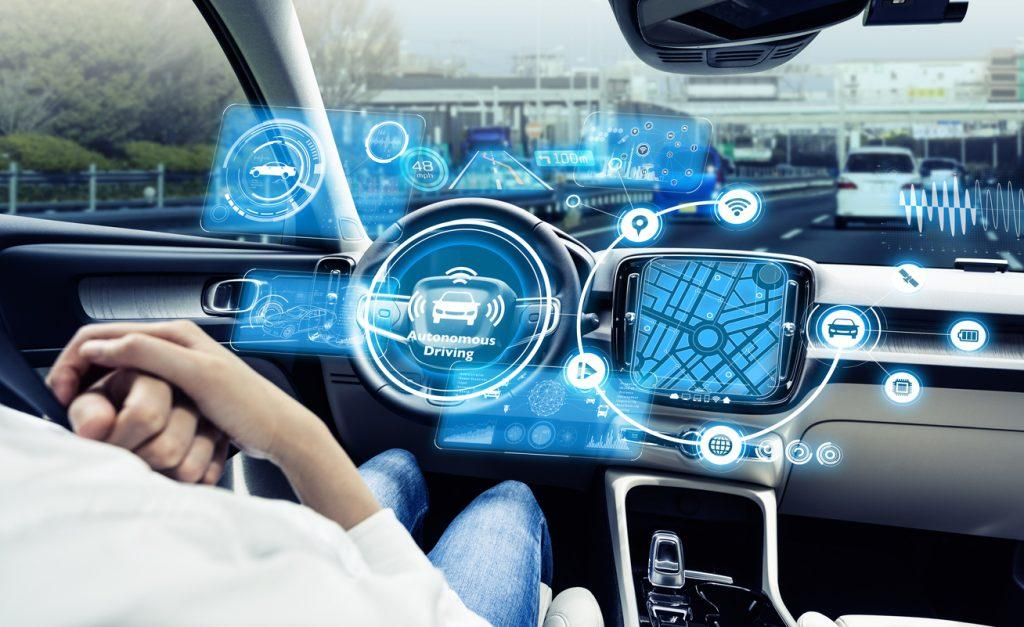

# <div style="text-align: center; background-color: black; color: white; padding: 14px; line-height: 1;border-radius:0px"> 1) Driver monitoring system : </div>

 Build a high-precision precision monitoring system to annotate facial features such as eyes, head, mouth, etc. with accuracy and relevant data for blink researcher and blink estimation.


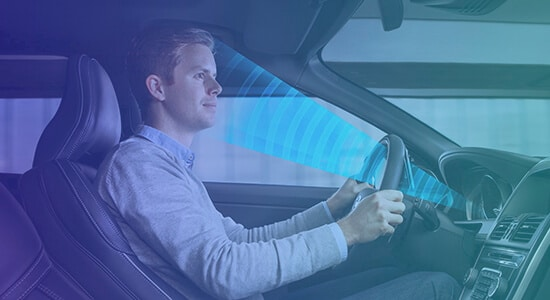


# <div style="text-align: center; background-color: black; color: white; padding: 14px; line-height: 1;border-radius:0px">  2) Traffic management: </div>


Using artificial intelligence to prevent traffic jams, as smart systems can now process complex data and recommend the best route for travelers. Sensors and cameras, when placed on roads, collect a large number of traffic details. This data can then be sent to the cloud, where an analysis of traffic patterns will be performed using big data analytics and an AI-powered system. Through this analysis, passengers can be provided with valuable insights and information about traffic forecasts, accidents, or road blockages.AI systems could use this information to provide drivers with the fastest route to their destination


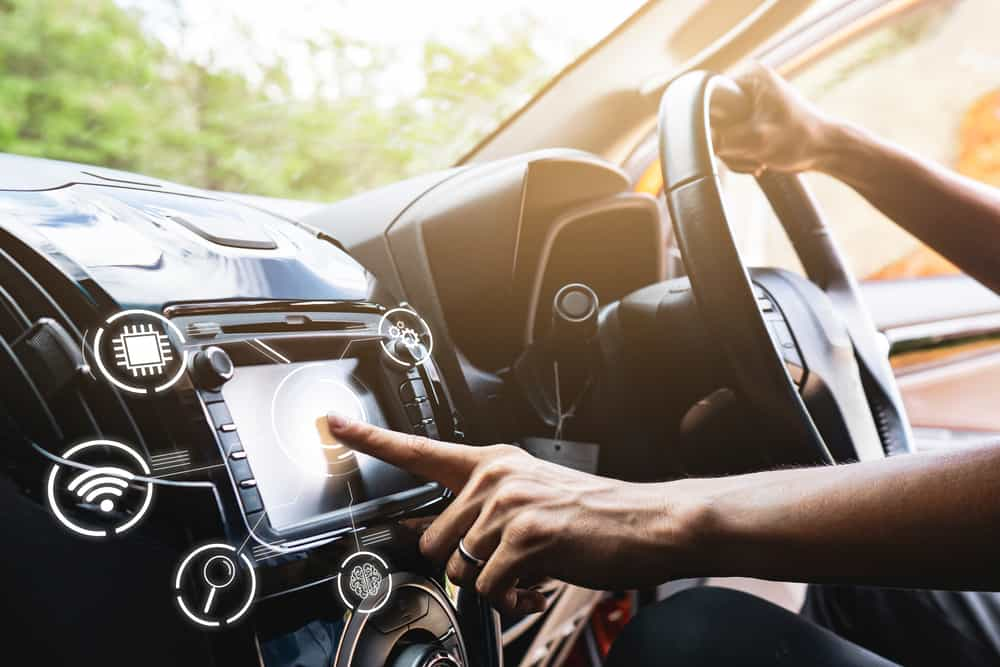

https://youtu.be/wCfUdKkqI5g

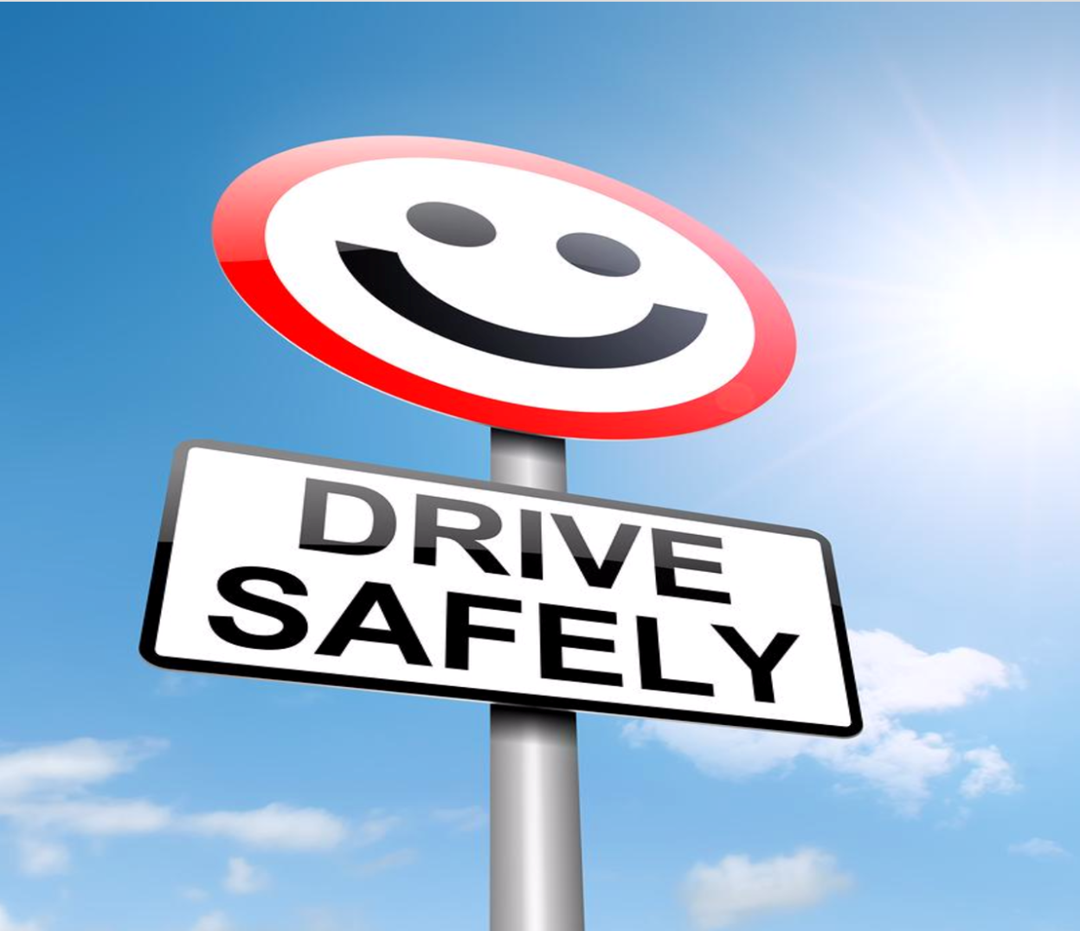